In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy import units as u
from astropy import constants as const
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
const.k_B

<<class 'astropy.constants.codata2014.CODATA2014'> name='Boltzmann constant' value=1.38064852e-23 uncertainty=7.9e-30 unit='J / K' reference='CODATA 2014'>

In [3]:
def getRegion(data, startx, starty, width):
    out = data[starty:starty+width]
    output = list()
    #This works but I hate it
    for _,item in enumerate(out):
        output.append(item[startx:startx + width])
    
#The final product for the image
    return np.array(output)

def removeBias(bias, image):
    """
    Removes the bias frame from the original image
    """
    return image - bias

def getImageFile(location):
    """
    Gets the 2D array from the given fits file
    """
    return fits.open(location)[0].data
"""
def averagePixels(imagesList):
    for i,image in enumerate(imagesList):
        for y,xvalues in enumerate(image):
            for x,values in enumerate(xvalues):

"""

#Man this sucked
def subtraction(list1, list2):
    #What we will be outputing at the end
    output = list()
    
    #First for loop. Gives current y location and all the x-values
    #  along that y-location
    for y,xvalues in enumerate(list1):
        
        # Creating list for x values after subtraction at the current y
        xterms = list()
        
        # gives the current x value location and the value at that location
        #  Because of how this is written we are only getting the
        #  value at that x,y location from list1
        for x,value1 in enumerate(xvalues):
            # list2 value at that x,y location
            value2 = list2[y][x]
            
            #Finally the math
            if value1 > value2:
                # If the value for the first list is larger than the second
                #  one we can do a standard subtraction
                value = value1 - value2
            elif value1 < value2:
                # If the second number is larger then I'll reverse the order
                #  This is an absolute value version of the math
                value = value2 - value1
            else:
                #the last instance is if they are equal
                value = 0
            
            # adds value from above to the value for the current x
            xterms.append(value)
        # Adds all the values for the given x to the current y
        output.append(xterms)
    
    return np.array(output)
    
def ReadNoise(Gain,stdBias):
    num = Gain *stdBias
    denom = np.sqrt(2)
    return num/denom

def gain(meanFlat1,meanFlat2, meanBias1,meanBias2, sdFlat,sdBias):
    num = (meanFlat1+meanFlat2) - (meanBias1+meanBias2)
    denom = sdFlat**2 - sdBias**2
    return num/denom

for lecture
password: shebDejO

In [4]:
x = 130
y = 300

bias1 = getImageFile("data/bias1.FIT")
bias_region1 = getRegion(bias1,x,y,100)

bias2 = getImageFile("data/bias3.FIT")
bias_region2 = getRegion(bias2,x,y,100)

bias = subtraction(bias_region1, bias_region2)

flat1 = getImageFile("data/18_sec.FIT")
flat_region1 = getRegion(flat1,x,y,100)

flat2 = getImageFile("data/18_sec2.FIT")
flat_region2 = getRegion(flat2,x,y,100)

flat = subtraction(flat_region1, flat_region2)

In [5]:
gainDevice = gain(flat_region1.mean(),flat_region2.mean(), 
    bias_region1.mean(), bias_region2.mean(),
    flat.std(),bias.std())
print(gainDevice)

1.411619879088921


In [6]:
ReadNoise(gainDevice, bias.std())

11.598398909368193

In [7]:
everyImageLocation = ["data/1.5_sec.FIT", "data/3_sec.FIT", "data/6_sec.FIT", "data/12_sec.FIT",
              "data/15_sec.FIT", "data/18_sec.FIT", "data/24_sec.FIT", "data/30_sec.FIT", "data/36_sec.FIT",
              "data/42_sec.FIT", "data/48_sec.FIT", "data/54_sec.FIT", "data/60_sec.FIT", "data/80_sec.FIT"]
time = [1.5,3,6,12,15,18,24,30,36,42,48,54,60,80]

In [8]:
everyImageFile = list()
for _,itm in enumerate(everyImageLocation):
    everyImageFile.append(getImageFile(itm))
everyImageFile = np.array(everyImageFile)

In [9]:
everyImageCount = list()
for _,itm in enumerate(everyImageFile):
    everyImageCount.append(itm.mean())


In [10]:
everyImageCount

[3174.873509727365,
 5353.182539267797,
 9578.537011703198,
 18178.722682067706,
 23983.323802245082,
 28975.71633557792,
 36629.3183851927,
 45259.308314732145,
 52164.64617829521,
 56429.00578814302,
 57330.156084828894,
 57626.19552432961,
 57723.53151408714,
 57786.300761964485]

In [25]:
time

[1.5, 3, 6, 12, 15, 18, 24, 30, 36, 42, 48, 54, 60, 80]

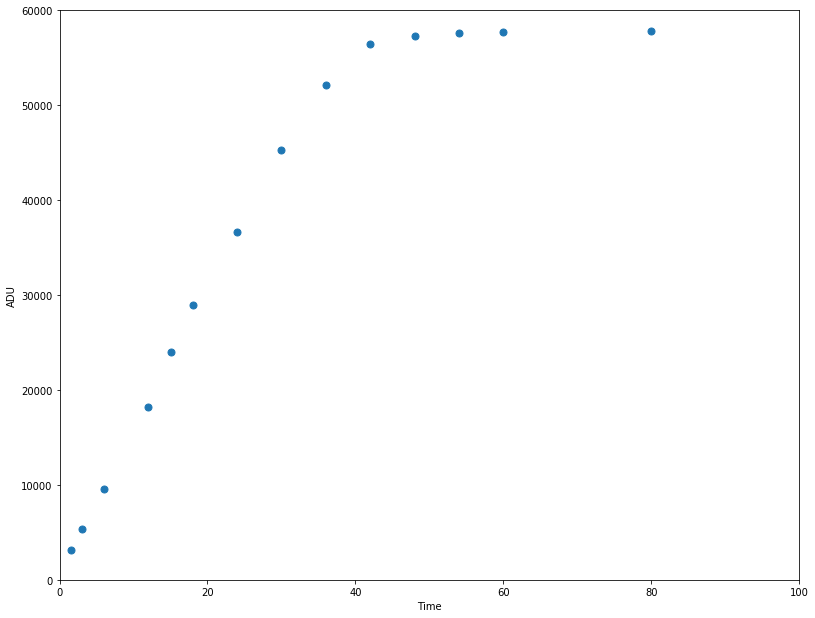

In [28]:
fig,ax = plt.subplots(1,1)                    # One window
fig.set_size_inches(11,8.5)                   # (width,height) - letter paper landscape

fig.tight_layout()                            # Make better use of space on plot

ax.set_xlim(0.0,100.0)
ax.set_ylim(0.0,60000.0)

ax.set_xlabel("Time")
ax.set_ylabel("ADU")
    
ax.plot(time, everyImageCount,marker="o",linestyle="None",markersize=7)

In [12]:
data = pd.read_csv("data/Temp vs Dark Current.csv")

In [13]:
data["Dark - Bias (mean ADUs)"]

0      13
1      15
2      16
3      17
4      19
5      22
6      24
7      28
8      32
9      37
10     43
11     50
12     62
13     89
14    139
Name: Dark - Bias (mean ADUs), dtype: int64

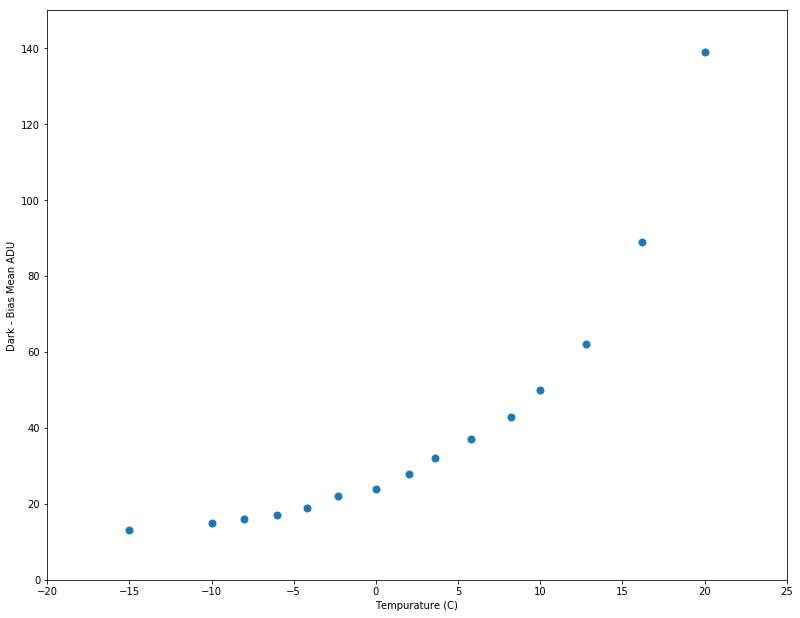

In [30]:
fig,ax = plt.subplots(1,1)                    # One window
fig.set_size_inches(11,8.5)                   # (width,height) - letter paper landscape

fig.tight_layout()                            # Make better use of space on plot

ax.set_xlim(-20,25)
ax.set_ylim(0.0,150.0)

ax.set_xlabel("Tempurature (C)")
ax.set_ylabel("Dark - Bias Mean ADU")
    
ax.plot(data["Temperature (C) ±0.3C"], data["Dark - Bias (mean ADUs)"],marker="o",linestyle="None",markersize=7)


y = Ke^(-bx)
y/k = e^(-bx)
ln(y/k) = (-bx)
b = -ln(y/k)T
E_g/2k = -ln(y/k)2kT

In [15]:
K=22.58096919
k = 8.6175*10**(-5)
T = data["Temperature (C) ±0.3C"] +273
y = data["Dark - Bias (mean ADUs)"]*2.3/120
E_g = -np.log(y/K)*2*k*T

In [16]:
E_g

0     0.200398
1     0.197795
2     0.196352
3     0.195044
4     0.191206
5     0.185718
6     0.183202
7     0.177238
8     0.171903
9     0.166294
10    0.160442
11    0.154113
12    0.145042
13    0.128749
14    0.107926
dtype: float64

In [17]:
def f(T,E):
    K=22.58096919
    return K*np.e**(T*E/(2*k))

In [18]:
np.e

2.718281828459045

In [19]:
# E
guesses = [-500]

In [20]:
fitpars, error = curve_fit(f,data["Temperature (C) ±0.3C"],data["Dark - Bias (mean ADUs)"],p0=guesses)

/Users/xavier/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [21]:
fitpars

array([-500.])

In [22]:
error

array([[inf]])